In [1]:
import os
import pandas as pd

In [2]:
os.chdir('D:\\IITK DATA ANALYTICS\\Python\\Self Projects\\Python EDA Practice')
os.getcwd()

'D:\\IITK DATA ANALYTICS\\Python\\Self Projects\\Python EDA Practice'

In [3]:
netflix = pd.read_csv('Netflix.csv')
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
# check for NA Values
print(netflix.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [5]:
# we have NA values in some columns hence we will treat these NA values 
# lets start with 'duration' column
print(netflix[netflix['duration'].isnull()])

     show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country          date_added  release_year  rating  \
5541  Louis C.K.  United States       April 4, 2017          2017  74 min   
5794  Louis C.K.  United States  September 16, 2016          2010  84 min   
5813  Louis C.K.  United States     August 15, 2016          2015  66 min   

     duration listed_in                                        description  
5541      NaN    Movies  Louis C.K. muses on religion, eternal love, gi...  
5794      NaN    Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813      NaN    Movies  The comic puts his trademark hilarious/thought...  


In [6]:
# here notice that duration column is null but rating column has been filled with durations for the corresponding show ids
# hence we will populate the duration values for these rows and deal with the wrong entry in rating column later.
# these rows are 5541, 5794, 5813
netflix.loc[netflix['show_id'] == 's5542','duration'] = '74 min'
netflix.loc[netflix['show_id'] == 's5795','duration'] = '84 min'
netflix.loc[netflix['show_id'] == 's5814','duration'] = '66 min'
print(netflix['duration'].isnull().sum())



0


In [7]:
# check for NA Values
print(netflix.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           0
listed_in          0
description        0
dtype: int64


In [8]:
# now we will deal with the null values in rating column
print(netflix[netflix['rating'].isnull()])
print('\n\n',netflix['rating'].unique())

     show_id     type                                              title  \
5989   s5990    Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
6827   s6828  TV Show                  Gargantia on the Verdurous Planet   
7312   s7313  TV Show                                       Little Lunch   
7537   s7538    Movie                               My Honor Was Loyalty   

             director                                               cast  \
5989              NaN                        Oprah Winfrey, Ava DuVernay   
6827              NaN  Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...   
7312              NaN  Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...   
7537  Alessandro Pepe  Leone Frisa, Paolo Vaccarino, Francesco Miglio...   

        country        date_added  release_year rating  duration  \
5989        NaN  January 26, 2017          2017    NaN    37 min   
6827      Japan  December 1, 2016          2013    NaN  1 Season   
7312  Australia  February 1, 2018 

In [9]:
# we see that durations have been entered in the rating column, we need to delete this.
print(netflix[netflix['rating'].str.contains('min', case = False, na = False)])

     show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country          date_added  release_year  rating  \
5541  Louis C.K.  United States       April 4, 2017          2017  74 min   
5794  Louis C.K.  United States  September 16, 2016          2010  84 min   
5813  Louis C.K.  United States     August 15, 2016          2015  66 min   

     duration listed_in                                        description  
5541   74 min    Movies  Louis C.K. muses on religion, eternal love, gi...  
5794   84 min    Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813   66 min    Movies  The comic puts his trademark hilarious/thought...  


In [10]:
# the rows are 5541, 5974, 5813
# Set the values to 'unknown'

netflix.loc[netflix['show_id'] == 's5542','rating'] = 'unknown'
netflix.loc[netflix['show_id'] == 's5795','rating'] = 'unknown'
netflix.loc[netflix['show_id'] == 's5814','rating'] = 'unknown'

# set already existing null values to 'unknown'
netflix.loc[netflix['rating'].isnull(),'rating'] = 'unknown'

print(netflix.loc[netflix['rating']=='unknown'])


     show_id     type                                              title  \
5541   s5542    Movie                                    Louis C.K. 2017   
5794   s5795    Movie                              Louis C.K.: Hilarious   
5813   s5814    Movie               Louis C.K.: Live at the Comedy Store   
5989   s5990    Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
6827   s6828  TV Show                  Gargantia on the Verdurous Planet   
7312   s7313  TV Show                                       Little Lunch   
7537   s7538    Movie                               My Honor Was Loyalty   

             director                                               cast  \
5541       Louis C.K.                                         Louis C.K.   
5794       Louis C.K.                                         Louis C.K.   
5813       Louis C.K.                                         Louis C.K.   
5989              NaN                        Oprah Winfrey, Ava DuVernay   
6827       

In [11]:
# check for NA Values
print(netflix.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64


In [12]:
# now we have significant null values for director, cast, and country column
# we will start with EDA for insights

import matplotlib.pyplot as plt

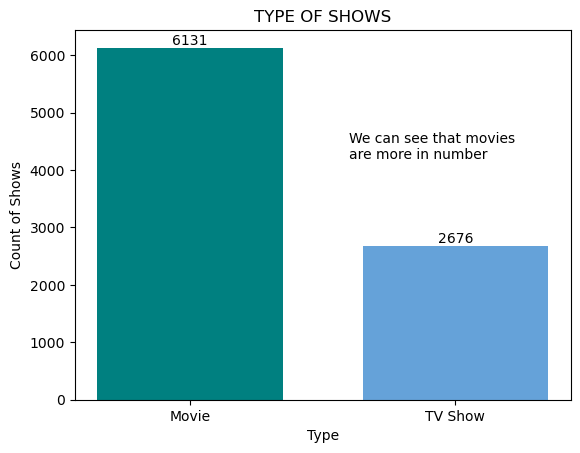

In [13]:
# to know the distribution of Tv shows and movies
#plt.grid(color = 'black', linestyle = '-', linewidth = 0.1, zorder = 0)

plt.bar(netflix['type'].value_counts().index, netflix['type'].value_counts(), 
        color = ['#008080', '#65A2D9'], width = 0.7)
plt.xlabel('Type')
plt.ylabel('Count of Shows')
plt.title('TYPE OF SHOWS')
plt.bar_label(plt.bar(netflix['type'].value_counts().index, netflix['type'].value_counts(), 
        color = ['#008080', '#65A2D9'], width = 0.7))
plt.text(0.6,4200,'We can see that movies\nare more in number')
plt.show()

In [15]:
# to check which country produces the most shows

print(netflix['country'].isnull().sum())

# we will replace null values with 'unknown' to move ahead with the analysis

831


In [16]:
netflix.loc[netflix['country'].isnull(),'country'] = 'unknown'
print(netflix['country'].isnull().sum())

0


In [17]:
#plot visualization to understand country distribution
# as we have multiple values for rows we will use explode function to create unique dataframe of countries

Country_List = netflix['country'].str.split(',').explode()
Country_List.value_counts()

United States     3211
India             1008
unknown            831
United Kingdom     628
 United States     479
                  ... 
 Ecuador             1
Iran                 1
Cyprus               1
 Mongolia            1
 Montenegro          1
Name: country, Length: 198, dtype: int64

In [18]:
# we see that list has duplicate  values because of spaces etc, lets clean this

clean_country_list = [i.strip() for i in Country_List]
clean_country_list
clean_country_df = pd.DataFrame(clean_country_list, columns=['Country'])
clean_country_df['Country'].value_counts()

United States     3690
India             1046
unknown            831
United Kingdom     806
Canada             445
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Name: Country, Length: 124, dtype: int64

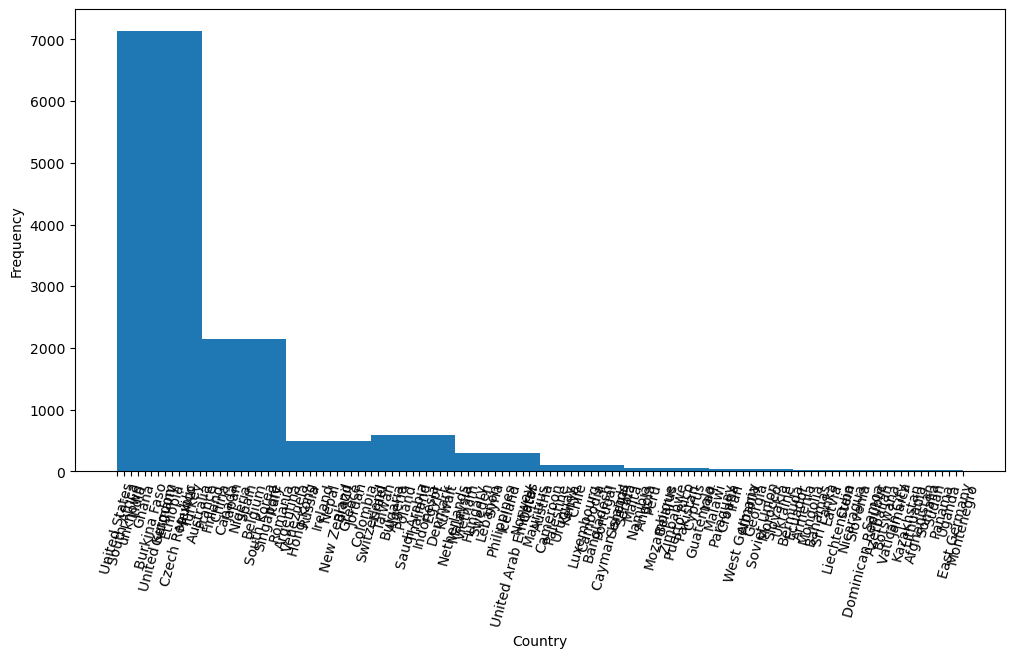

In [19]:
# now that the list is sorted, plot graphs for countries
# first we'll check with histogram

plt.figure(figsize=(12,6))
plt.hist(clean_country_df['Country'])
plt.xlabel('Country')
plt.xticks(rotation = 75)
plt.ylabel('Frequency')
plt.show()

In [20]:
# histogram is not clear and is giving a cluttered picture,
# lets try other graphs

# lets try a tree map, import squarify
import squarify

United States     3690
India             1046
unknown            831
United Kingdom     806
Canada             445
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Name: Country, Length: 124, dtype: int64

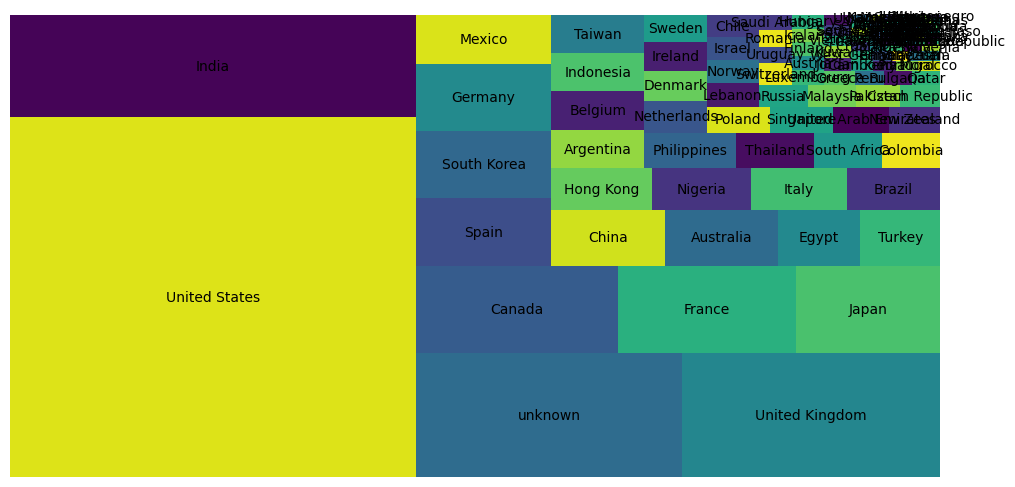

In [21]:
sizes = clean_country_df['Country'].value_counts()
lables = clean_country_df['Country'].value_counts().index

plt.figure(figsize=(12,6))
squarify.plot(sizes=sizes, label=lables)
plt.axis('off')
plt.show

clean_country_df['Country'].value_counts()

#this tree map says that United States and India are the top two countries with most shows/movies on netflix

In [23]:
# we analyse the listed_in column to understand the genre distribution

genre_list = netflix['listed_in'].str.split(',').explode()
genre_list = [i.strip() for i in genre_list]
genre_list = pd.DataFrame(genre_list, columns=['Genres'])
top_10_genres = genre_list['Genres'].value_counts().head(10)
top_10_genres

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: Genres, dtype: int64

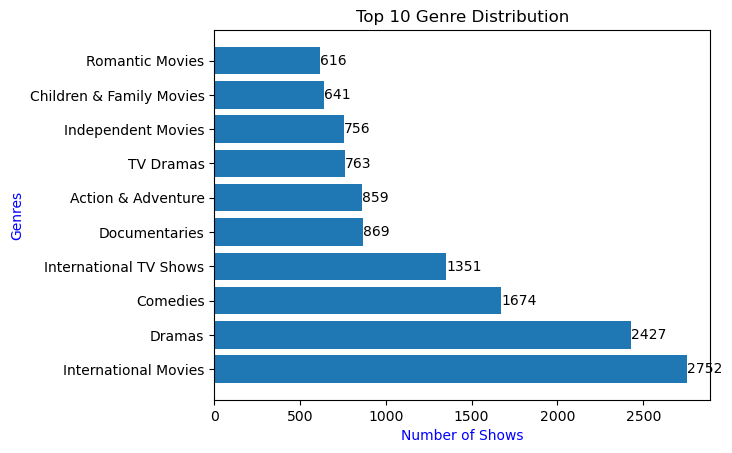

In [200]:
# plot graph for these top 10 genres
#plt.figure(figsize=(10,5))
plt.barh(top_10_genres.index, top_10_genres, color='#65A2D9')
plt.title('Top 10 Genre Distribution')
plt.xlabel('Number of Shows', color="blue")
plt.ylabel('Genres', color="blue")
plt.bar_label(plt.barh(top_10_genres.index, top_10_genres))
plt.show()


In [24]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [29]:
# now we will analyse 5  shortes and 5 longest movies

netflix_movies = netflix[netflix['type']=='Movie']
netflix_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
